# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

/tmp/ipykernel_814457/2980780030.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.shapey = data['SeriousDlqin2yrs']


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

In [6]:
X 

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
112910,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
112911,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
112912,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
112913,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


In [7]:
y

0         1
1         0
2         0
3         0
4         0
         ..
112910    0
112911    0
112912    0
112913    0
112914    0
Name: SeriousDlqin2yrs, Length: 108648, dtype: int64

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)#70%的训练集，30%的测试集,random_state 随机切分的标记

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64


<Axes: xlabel='SeriousDlqin2yrs'>

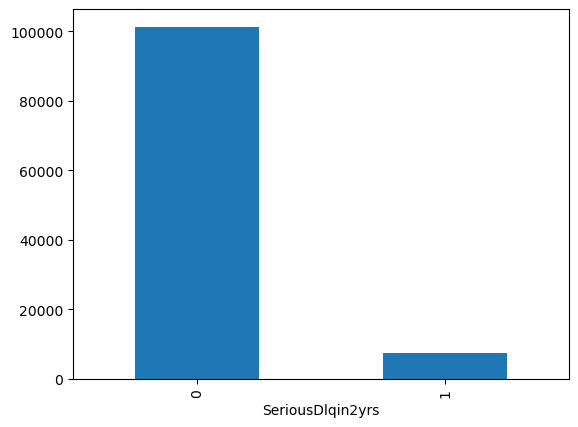

In [9]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
print(y.value_counts())

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
y.value_counts().plot(kind='bar')

#### 2.数据预处理之离散化

In [10]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

In [11]:
#查看分桶边界
X_train['age'].describe()

count    76053.000000
mean        51.343129
std         14.437048
min          0.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        103.000000
Name: age, dtype: float64

In [12]:
bins=np.arange(0,106,3)#分箱
bins

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105])

In [13]:
X_train.loc[:,'age_bins']=pd.cut(X_train['age'],bins) #区间离散化
X_test.loc[:,'age_bins']=pd.cut(X_test['age'],bins) #区间离散化

In [14]:
# 查看新数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 11), (32595, 11), (76053,), (32595,))

In [15]:
print(X_train[['age','age_bins']])#查看区间离散化情况


         age  age_bins
64329   27.0  (24, 27]
70087   83.0  (81, 84]
77642   72.0  (69, 72]
6017    56.0  (54, 57]
106521  83.0  (81, 84]
...      ...       ...
22092   48.0  (45, 48]
47726   28.0  (27, 30]
44326   67.0  (66, 69]
45320   29.0  (27, 30]
70966   58.0  (57, 60]

[76053 rows x 2 columns]


#### 3.数据预处理之独热向量编码

In [16]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成


#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
#对分箱后的年龄进行独热向量编码,即将不同的年龄分区值变成不同的列名

age=pd.get_dummies(X_train,columns=['age_bins'],prefix_sep='_')
age


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_bins_(0, 3]","age_bins_(3, 6]","age_bins_(6, 9]","age_bins_(9, 12]","age_bins_(12, 15]","age_bins_(15, 18]","age_bins_(18, 21]","age_bins_(21, 24]","age_bins_(24, 27]","age_bins_(27, 30]","age_bins_(30, 33]","age_bins_(33, 36]","age_bins_(36, 39]","age_bins_(39, 42]","age_bins_(42, 45]","age_bins_(45, 48]","age_bins_(48, 51]","age_bins_(51, 54]","age_bins_(54, 57]","age_bins_(57, 60]","age_bins_(60, 63]","age_bins_(63, 66]","age_bins_(66, 69]","age_bins_(69, 72]","age_bins_(72, 75]","age_bins_(75, 78]","age_bins_(78, 81]","age_bins_(81, 84]","age_bins_(84, 87]","age_bins_(87, 90]","age_bins_(90, 93]","age_bins_(93, 96]","age_bins_(96, 99]","age_bins_(99, 102]","age_bins_(102, 105]"
64329,0.116959,27.0,0.0,0.326024,3100.0,7.0,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
70087,0.050666,83.0,0.0,0.177182,10000.0,9.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
77642,0.038865,72.0,0.0,0.016600,5722.0,7.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
6017,0.023513,56.0,0.0,0.266260,10500.0,8.0,0.0,2.0,0.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106521,0.039350,83.0,0.0,0.195179,1700.0,3.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22092,0.576336,48.0,1.0,0.303042,10750.0,17.0,0.0,1.0,0.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
47726,1.000000,28.0,0.0,0.068123,2700.0,2.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
44326,0.275989,67.0,0.0,0.267683,4000.0,4.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
45320,0.979204,29.0,1.0,0.098725,4000.0,5.0,0.0,0.0,0.0,3.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [17]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)#70%的训练集，30%的测试集,random_state 随机切分的标记

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#标准化
X_train_std=std.fit_transform(X_train)
X_test_std=std.fit_transform(X_test)
## 查看数据维度
X_train_std.shape, X_test_std.shape

((76053, 10), (32595, 10))

In [18]:
print(X_train_std.mean())  # 瞅一眼训练集的平均值
print(X_train_std.std())   # 瞅一眼训练集的方差
print(X_test_std.mean())  # 瞅一眼测试集的平均值
print(X_test_std.std())   # 瞅一眼测试集的方差

-4.295787804590142e-17
1.0
-3.0387991214897363e-17
0.9999999999999999


#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [61]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

# 建立模型
lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2') 
# 训练模型
lr.fit(X_train_std, y_train)
#预测
y_train_pred = lr.predict(np.array(X_train_std))  # 训练集上的预测
y_test_pred = lr.predict(np.array(X_test_std))    # 测试集上的预测

# 测试集预测不对的样本数
print('测试集预测不对的样本数: %d' % (y_test != y_test_pred).sum()) 

#系数
lr_Coef =lr.coef_
print("系数为",lr_Coef)

from sklearn.metrics import accuracy_score
#准确率
train_acc=accuracy_score(y_train, y_train_pred)
test_acc=accuracy_score(y_test, y_test_pred)
print("训练集的准确率:%.3f"%train_acc)
print("测试集的准确率:%.3f"%test_acc)

# 截距
lr_intercept=lr.intercept_
print('截距: %.3f'%lr_intercept)

测试集预测不对的样本数: 2156
系数为 [[-0.01428302 -0.36429906  1.72892458  0.31210449 -0.11519959 -0.09188134
   1.68983565 -0.1964285  -3.24882741  0.11639198]]
训练集的准确率:0.933
测试集的准确率:0.934
截距: -2.859


/tmp/ipykernel_570228/4124148766.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('截距: %.3f'%lr_intercept)


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [66]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
#创建网格
param_grid = {'C': [1, 10, 100, 500],
              'penalty': ['l1','l2']}

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
#五折网格搜索
grid_search = GridSearchCV(lr,param_grid,cv=5)


In [68]:
grid_search.fit(X_train_std, y_train)

# 输出最好的超参数
print("最好的超参数: ", grid_search.best_params_)

# 输出最好的模型
print("最好的模型: ", grid_search.best_estimator_)

/home/sp/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sp/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sp/.local/lib/python3.9/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/sp/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

最好的超参数:  {'C': 10, 'penalty': 'l2'}
最好的模型:  LogisticRegression(C=10)


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

查准率:  0.9338855652707471
查全率:  0.046522339935513586
auc:  0.5218642464862948
f1值:  0.08570216376750106


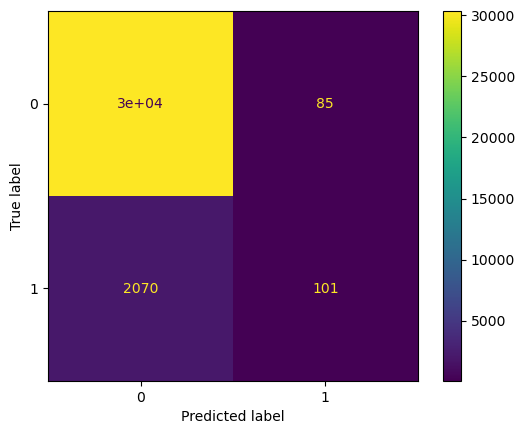

In [72]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix,f1_score,ConfusionMatrixDisplay
lr_best=LogisticRegression(C=10,penalty='l2')
lr_best.fit(X_train_std,y_train)
lr_best_pred=lr_best.predict(X_test_std)

print('查准率: ',lr_best.score(X_test_std,y_test))
print('查全率: ',recall_score(y_test, lr_best_pred))
print('auc: ',roc_auc_score(y_test, lr_best_pred))
print('f1值: ',f1_score(y_test, lr_best_pred))

lr_best_cm = confusion_matrix(y_test,lr_best_pred)

cm_display = ConfusionMatrixDisplay(lr_best_cm).plot()

#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

阈值为0.5的准确率: 0.9338855652707471
阈值为0.3的准确率: 0.9336401288541187


Text(0.5, 1.0, 'threshold:0.3')

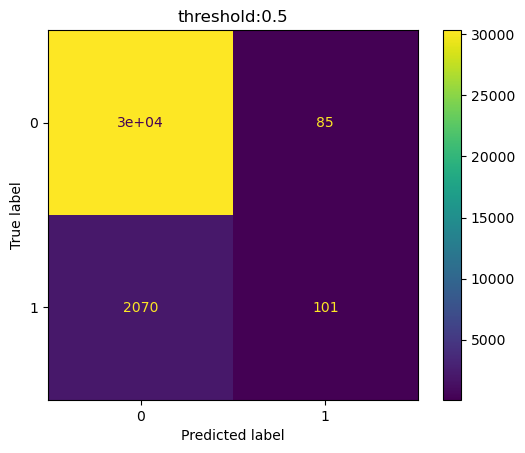

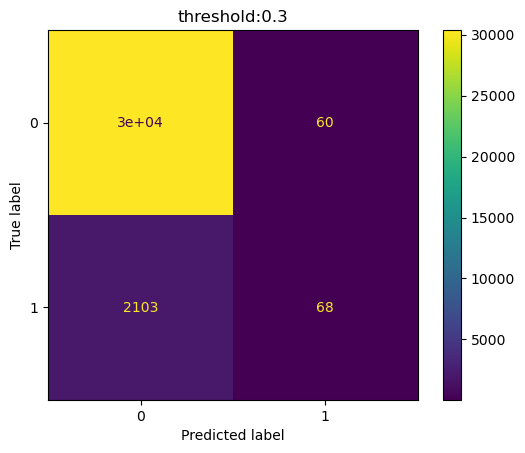

In [76]:
lr_best=LogisticRegression(C=10,penalty='l2')
lr_best.fit(X_train_std,y_train)
acc1=lr_best.score(X_test_std,y_test)
print('阈值为0.5的准确率:',acc1)
                                              
# 预测样本属于正类的概率
y_prob = lr_best.decision_function(X_test_std)
# 设置阈值
threshold = 0.3
# 将概率值转换为类别
lr_best_pred2 = [1 if prob >= threshold else 0 for prob in y_prob]
from sklearn.metrics import accuracy_score
# 计算准确性
acc2 = accuracy_score(y_test, lr_best_pred2)
print("阈值为0.3的准确率:", acc2)


# 画混淆矩阵图
cm = confusion_matrix(y_test,lr_best_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.title('threshold:0.5')

cm2 = confusion_matrix(y_test,lr_best_pred2)
cm_display2 = ConfusionMatrixDisplay(cm2).plot()
plt.title('threshold:0.3')


#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [80]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.feature_selection import SelectFromModel

lr=LogisticRegression(C=10,penalty='l2')
# sfm=SelectFromModel(lr,prefit=True)

# X_train_std_selected=sfm.transform(X_train_std)
# lr_selected = LogisticRegression(C=10,penalty='l2')
# lr_selected.fit(X_train_std_selected, y_train)


# 建立评估器
selector = SelectFromModel(estimator=lr).fit(X_train_std, y_train)
# estimator的模型参数系数
print("十个特征的重要性",selector.estimator_.coef_)

# 根据estimator中特征重要性均值获得阈值
print("用于特征选择的阈值；",selector.threshold_)

# 哪些特征入选最后特征，true表示入选
print("特征是否保留",selector.get_support())
# 获得最后结果
print("特征提取结果",selector.transform(X_train_std))


十个特征的重要性 [[-0.01428717 -0.36429751  1.72767996  0.31211219 -0.11518815 -0.09190189
   1.68720119 -0.19646079 -3.24496378  0.11641158]]
用于特征选择的阈值； 0.7870504201386906
特征是否保留 [False False  True False False False  True False  True False]
特征提取结果 [[-0.10690634 -0.06094714 -0.05438132]
 [-0.10690634 -0.06094714 -0.05438132]
 [-0.10690634 -0.06094714 -0.05438132]
 ...
 [-0.10690634 -0.06094714 -0.05438132]
 [ 0.17284964 -0.06094714 -0.05438132]
 [ 0.45260561 -0.06094714 -0.05438132]]


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [81]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'n_estimators': [10,50,100]}
model = RandomForestClassifier() 

#五折网格搜索
grid_search = GridSearchCV(model,param_grid,cv=5)
grid_search.fit(X_train_std, y_train)

# 输出最好的超参数
print("最好的超参数: ", grid_search.best_params_)

# 输出最好的模型
print("最好的模型: ", grid_search.best_estimator_)





最好的超参数:  {'criterion': 'log_loss', 'n_estimators': 100}
最好的模型:  RandomForestClassifier(criterion='log_loss')


In [82]:
forest_best = RandomForestClassifier(criterion='log_loss', 
                                n_estimators=100, # The number of trees in the forest.
                                )
# 训练模型
forest_best.fit(X_train_std, y_train)
#评估模型
forest_best.score(X_test_std, y_test)

0.9356036201871453

In [ ]:
# 支持向量机
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'rbf'],'max_iter': [100000] }
model = SVC()

#五折网格搜索
grid_search = GridSearchCV(model,param_grid,cv=5)
grid_search.fit(X_train_std, y_train)

# 输出最好的超参数
print("最好的超参数: ", grid_search.best_params_)

#耗时太久

In [20]:
from sklearn.svm import SVC
SVM_best = SVC(kernel='linear',max_iter=100000)
# 训练模型
SVM_best.fit(X_train_std, y_train)
#评估模型
SVM_best.score(X_test_std, y_test)

/home/sp/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9334560515416475

In [19]:
# K近邻
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [5,6,7]
              }
model = knn = KNeighborsClassifier(metric='minkowski')

#五折网格搜索
grid_search = GridSearchCV(model,param_grid,cv=5)
grid_search.fit(X_train_std, y_train)

# 输出最好的超参数
print("最好的超参数: ", grid_search.best_params_)


最好的超参数:  {'n_neighbors': 7}


In [14]:
knn_best = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
# 训练模型
knn_best.fit(X_train_std, y_train)
#评估模型
knn_best.score(X_test_std, y_test)

0.9336401288541187